In [1]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np

import data

from matplotlib import pyplot as plt

%matplotlib widget

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ["[Errno 2] The file to load file system plugin from does not exist.: '/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so'"]
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: cannot open shared object file: No such file or directory']
  warnings.warn(f"file s

In [2]:
dfo = data.merged()

## Explore the dataset

First, lets pick only the temperatures (for now, the rest looks messy and I don't wanna deal with that at this time)

In [3]:
cols = [
    'T3(Warm Water Header - In) (°C)',
    'T4(Warm Water Header - Out) (°C)',
    'T5(Chill Water Header - Out) (°C)',
    'T6(Chill Water Header - In) (°C)',
    'T7(Ground Source Loop - In) (°C)',
    'T8(Ground Source Loop - Out) (°C)',
]

df = dfo[cols]

In [4]:
df

,T3(Warm Water Header - In) (°C),T4(Warm Water Header - Out) (°C),T5(Chill Water Header - Out) (°C),T6(Chill Water Header - In) (°C),T7(Ground Source Loop - In) (°C),T8(Ground Source Loop - Out) (°C)
DATE &TIME,,,,,,
2010-02-01 00:00:45.752,39.172123,38.691460,10.200813,11.972402,11.884285,11.729026
2010-02-01 00:01:45.752,39.108808,38.608212,10.220193,11.669458,11.884384,11.732222
2010-02-01 00:02:45.752,39.113483,38.515146,10.239061,11.878089,11.887980,11.730025
2010-02-01 00:03:45.752,38.927906,38.421467,10.256390,12.061815,11.889978,11.733120
2010-02-01 00:04:45.752,38.798430,38.365730,10.277821,11.922081,11.895671,11.734818
...,...,...,...,...,...,...
2012-07-31 23:55:12.797,31.353829,29.066114,12.594302,12.745378,18.872489,16.416854
2012-07-31 23:56:13.065,31.160630,29.069284,12.557183,12.747521,18.879780,16.419650
2012-07-31 23:57:12.987,31.138882,29.064273,12.613272,12.786716,18.874686,16.424044


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
T3(Warm Water Header - In) (°C),1313300.0,41.305896,15.302853,-99.0,38.194824,46.147905,48.501351,65.786378
T4(Warm Water Header - Out) (°C),1313300.0,41.842821,14.793194,-99.0,42.305656,45.751260,47.768740,70.410602
T5(Chill Water Header - Out) (°C),1313300.0,10.225578,11.671482,-99.0,6.627305,8.790212,11.023184,48.183988
T6(Chill Water Header - In) (°C),1313300.0,9.376129,11.439832,-99.0,6.220696,8.188728,10.076655,53.689942
T7(Ground Source Loop - In) (°C),1314260.0,15.258203,10.728404,-99.0,14.537197,16.431721,17.710185,38.758297
T8(Ground Source Loop - Out) (°C),1314260.0,14.243976,10.497538,-99.0,14.121872,14.967985,15.841480,22.336455


## Replace missing values

In [6]:
df = df.mask(df < -90, 0)
df = df.mask(df.isna(), 0)

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
T3(Warm Water Header - In) (°C),1314260.0,42.041203,9.782218,-0.3341,38.152546,46.144653,48.499623,65.786378
T4(Warm Water Header - Out) (°C),1314260.0,42.577736,8.920508,-0.4937,42.266972,45.748805,47.767104,70.410602
T5(Chill Water Header - Out) (°C),1314260.0,10.983587,6.647436,-0.6835,6.624044,8.787587,11.016827,48.183988
T6(Chill Water Header - In) (°C),1314260.0,10.134759,6.334504,-0.5670,6.217032,8.185737,10.072777,53.689942
T7(Ground Source Loop - In) (°C),1314260.0,16.078445,2.861993,0.0000,14.537197,16.431721,17.710185,38.758297
T8(Ground Source Loop - Out) (°C),1314260.0,15.064218,2.225865,0.0000,14.121872,14.967985,15.841480,22.336455


In [8]:
#df.plot()

## Prepare the data
Split

In [9]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

Normalize

In [10]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [11]:
"""df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure()
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ =ax.set_xticklabels(df.keys(), rotation=90)
"""

"df_std = (df - train_mean) / train_std\ndf_std = df_std.melt(var_name='Column', value_name='Normalized')\nplt.figure()\nax = sns.violinplot(x='Column', y='Normalized', data=df_std)\n_ =ax.set_xticklabels(df.keys(), rotation=90)\n"

In [12]:
class WindowGenerator:
    def __init__(
        self,
        input_width,
        label_width,
        shift,
        train_df=train_df,
        val_df=val_df,
        test_df=test_df,
        label_columns=None,
    ):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {
                name: i for i, name in enumerate(label_columns)
            }
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return "\n".join(
            [
                f"Total window size: {self.total_window_size}",
                f"Input indices: {self.input_indices}",
                f"Label indices: {self.label_indices}",
                f"Label column name(s): {self.label_columns}",
            ]
        )

    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [
                    labels[:, :, self.column_indices[name]]
                    for name in self.label_columns
                ],
                axis=-1,
            )

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def plot(self, model=None, plot_col="T (degC)", max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n + 1)
            plt.ylabel(f"{plot_col} [normed]")
            plt.plot(
                self.input_indices,
                inputs[n, :, plot_col_index],
                label="Inputs",
                marker=".",
                zorder=-10,
            )

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(
                self.label_indices,
                labels[n, :, label_col_index],
                edgecolors="k",
                label="Labels",
                c="#2ca02c",
                s=64,
            )
            if model is not None:
                predictions = model(inputs)
                plt.scatter(
                    self.label_indices,
                    predictions[n, :, label_col_index],
                    marker="X",
                    edgecolors="k",
                    label="Predictions",
                    c="#ff7f0e",
                    s=64,
                )

            if n == 0:
                plt.legend()

        plt.xlabel("Time")

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=512,
        )

        ds = ds.map(self.split_window)

        return ds

    @property
    def train(self):
        return self.make_dataset(self.train_df)


    @property
    def val(self):
        return self.make_dataset(self.val_df)


    @property
    def test(self):
        return self.make_dataset(self.test_df)


    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, "_example", None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result

In [13]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history


Total window size: 180
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
Label indices: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179]
Label column name(s): None

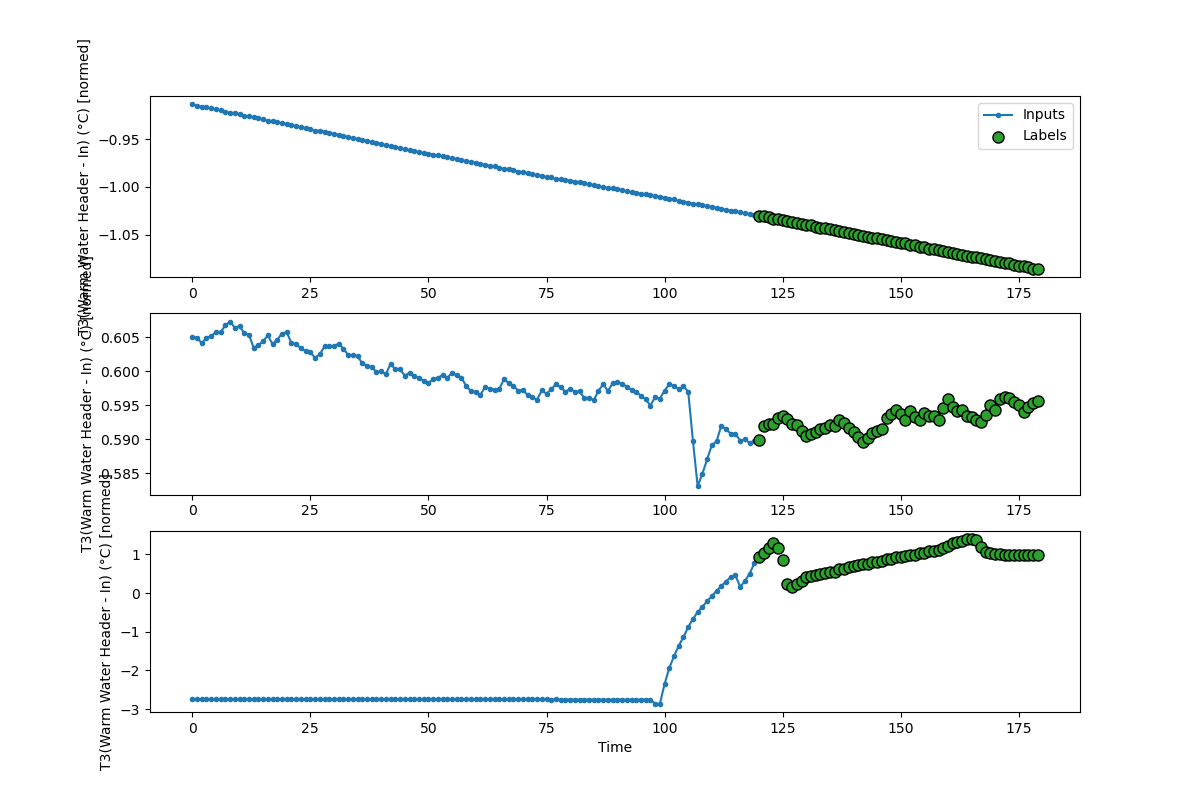

In [14]:
OUT_STEPS = 60
multi_window = WindowGenerator(input_width=120,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot(plot_col=df.columns[0])
multi_window

In [15]:
multi_val_performance = {}
multi_performance = {}


514/514 [==============================] - 34s 65ms/step - loss: 0.1468 - mean_absolute_error: 0.1741


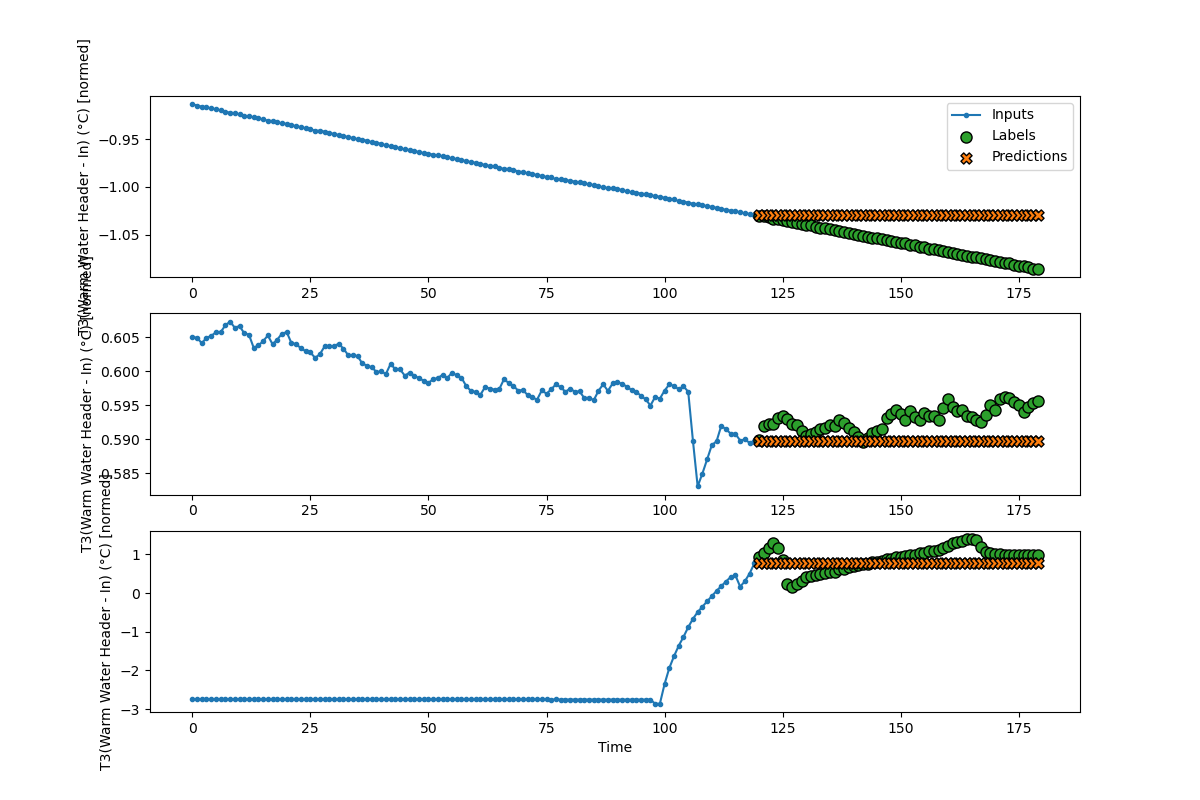

In [16]:
class MultiStepLastBaseline(tf.keras.Model):
    def call(self, inputs):
        return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline, plot_col=df.columns[0])

Epoch 1/20
1797/1797 [==============================] - 157s 87ms/step - loss: 0.1889 - mean_absolute_error: 0.2641 - val_loss: 0.1656 - val_mean_absolute_error: 0.2597
Epoch 2/20
1797/1797 [==============================] - 156s 86ms/step - loss: 0.0999 - mean_absolute_error: 0.1727 - val_loss: 0.1377 - val_mean_absolute_error: 0.2273
Epoch 3/20
1797/1797 [==============================] - 113s 62ms/step - loss: 0.0968 - mean_absolute_error: 0.1632 - val_loss: 0.1223 - val_mean_absolute_error: 0.2079
Epoch 4/20
1797/1797 [==============================] - 166s 92ms/step - loss: 0.0961 - mean_absolute_error: 0.1601 - val_loss: 0.1188 - val_mean_absolute_error: 0.2009
Epoch 5/20
1797/1797 [==============================] - 102s 57ms/step - loss: 0.0960 - mean_absolute_error: 0.1595 - val_loss: 0.1182 - val_mean_absolute_error: 0.1996
Epoch 6/20
1797/1797 [==============================] - 159s 88ms/step - loss: 0.0960 - mean_absolute_error: 0.1595 - val_loss: 0.1181 - val_mean_absolute_

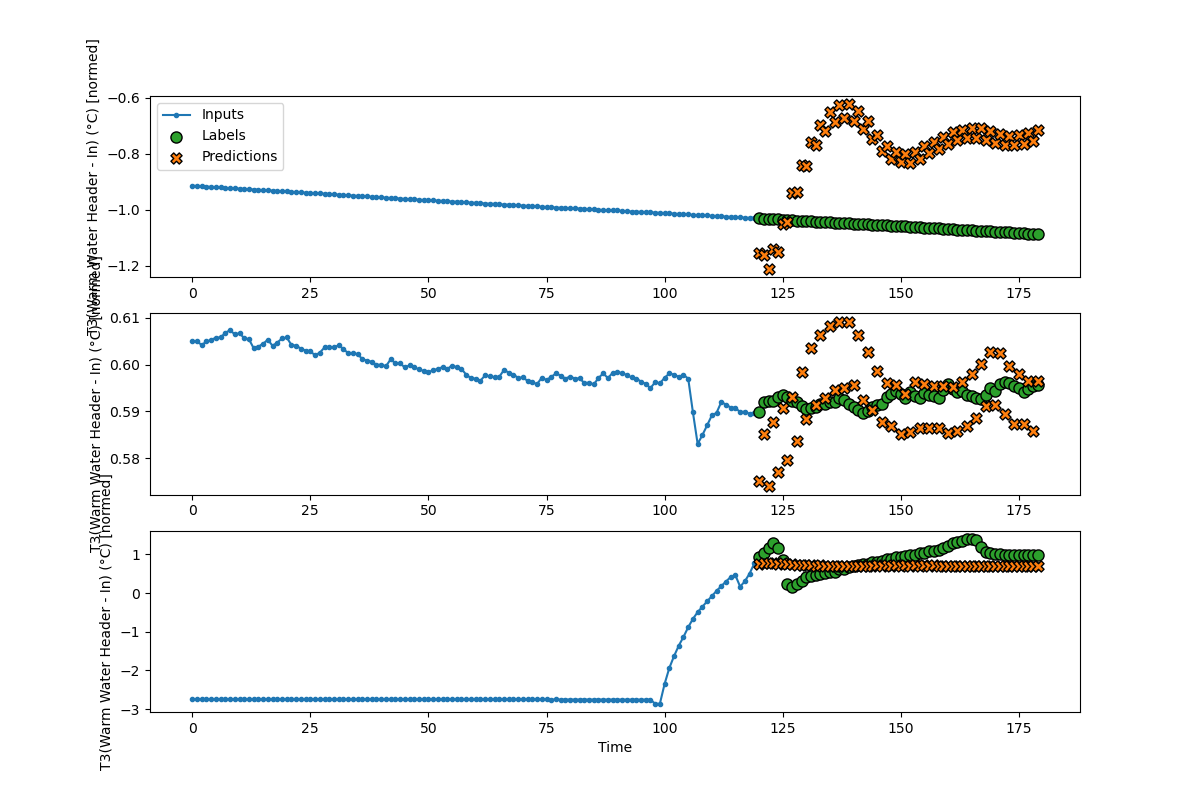

In [17]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model, plot_col=df.columns[0])


In [18]:
CONV_WIDTH = 20
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

multi_val_performance['conv1d'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['conv1d'] = multi_conv_model.evaluate(multi_window.test, verbose=0)

Epoch 1/20
1797/1797 [==============================] - 163s 90ms/step - loss: 0.0716 - mean_absolute_error: 0.1465 - val_loss: 0.1012 - val_mean_absolute_error: 0.1849
Epoch 2/20
1797/1797 [==============================] - 164s 91ms/step - loss: 0.0598 - mean_absolute_error: 0.1340 - val_loss: 0.1060 - val_mean_absolute_error: 0.1890
Epoch 3/20
514/514 [==============================] - 36s 69ms/step - loss: 0.1092 - mean_absolute_error: 0.1923


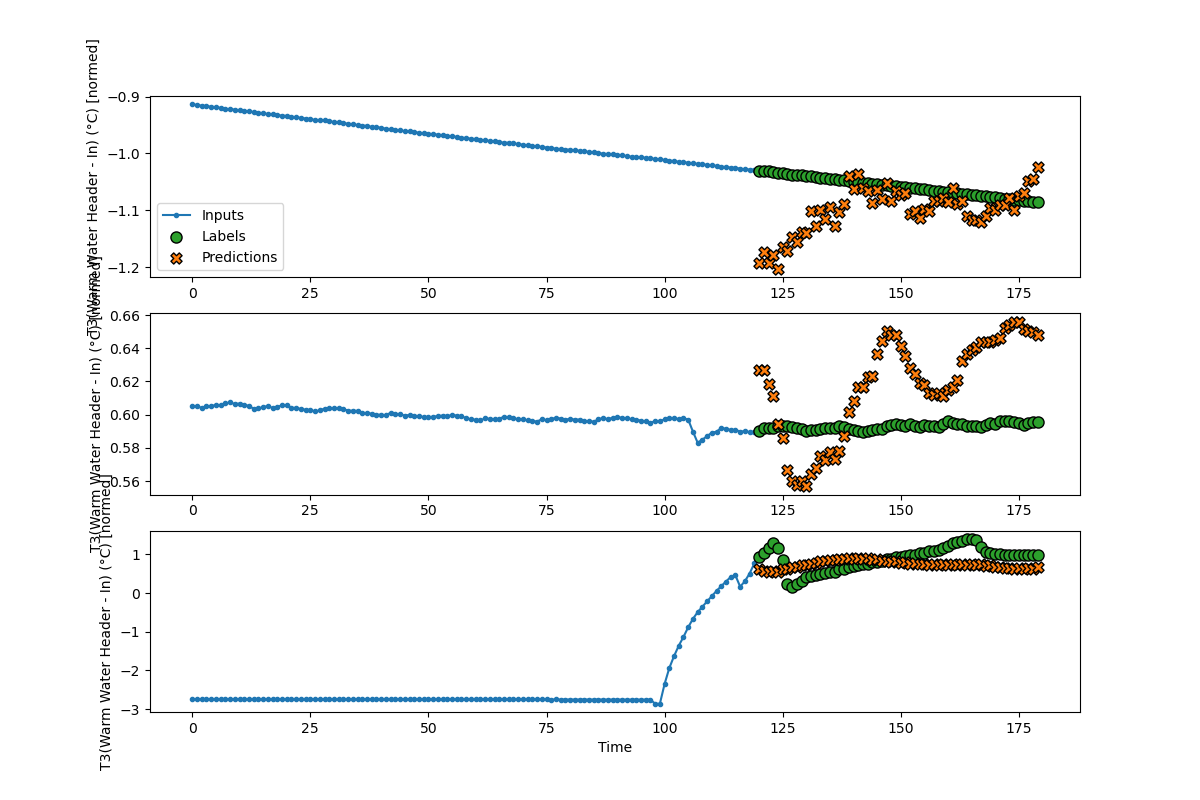

In [19]:
multi_window.plot(multi_conv_model, plot_col=df.columns[0])


In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)

Epoch 1/20
1797/1797 [==============================] - 594s 328ms/step - loss: 0.1166 - mean_absolute_error: 0.1816 - val_loss: 0.1279 - val_mean_absolute_error: 0.2172
Epoch 2/20
 403/1797 [=====>........................] - ETA: 7:10 - loss: 0.0677 - mean_absolute_error: 0.1372

In [ ]:
multi_window.plot(multi_lstm_model, plot_col=df.columns[0])

In [ ]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = multi_lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.figure()
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()
plt.show()